In [28]:
import subprocess
import sys
import pandas as pd
import requests
from datetime import datetime, timezone  # ✅ Correct timezone import

# Function to install missing packages safely
def install_package(package):
    try:
        __import__(package)
    except ImportError:
        try:
            print(f"📦 Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully.")
        except subprocess.CalledProcessError:
            print(f"❌ Failed to install {package}. Please install it manually.")

# Install required libraries if missing
install_package("matplotlib")
install_package("seaborn")

# Now import them after installation
import matplotlib.pyplot as plt
import seaborn as sns


# OpenWeatherMap API Key (Replace with your key)
API_KEY = "84531622ea3b9d28fe046f6af530a881"
BASE_URL = "https://api.openweathermap.org/data/2.5/air_pollution"

# Define Warsaw coordinates
lat, lon = 52.2298, 21.0122

# API request
params = {"lat": lat, "lon": lon, "appid": API_KEY}
response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    data = response.json()
    records = data["list"]

    # Process and store the data
    data_list = []
    for record in records:
        data_list.append({
            "datetime": datetime.fromtimestamp(record["dt"], timezone.utc).strftime('%Y-%m-%d %H:%M:%S'),
            "aqi": record["main"]["aqi"],
            "co": record["components"]["co"],
            "no": record["components"]["no"],
            "no2": record["components"]["no2"],
            "o3": record["components"]["o3"],
            "so2": record["components"]["so2"],
            "pm2_5": record["components"]["pm2_5"],
            "pm10": record["components"]["pm10"],
            "nh3": record["components"]["nh3"]
        })
    
    # Save to CSV
    df = pd.DataFrame(data_list)
    df.to_csv("warsaw_air_quality.csv", index=False)
    print("Data saved to 'warsaw_air_quality.csv'")

else:
    print(f"❌ API request failed: {response.status_code}")

Data saved to 'warsaw_air_quality.csv'


In [29]:
!python fetch_india_air_quality.py

Data saved to 'india_air_quality.csv'


# Data Visualization

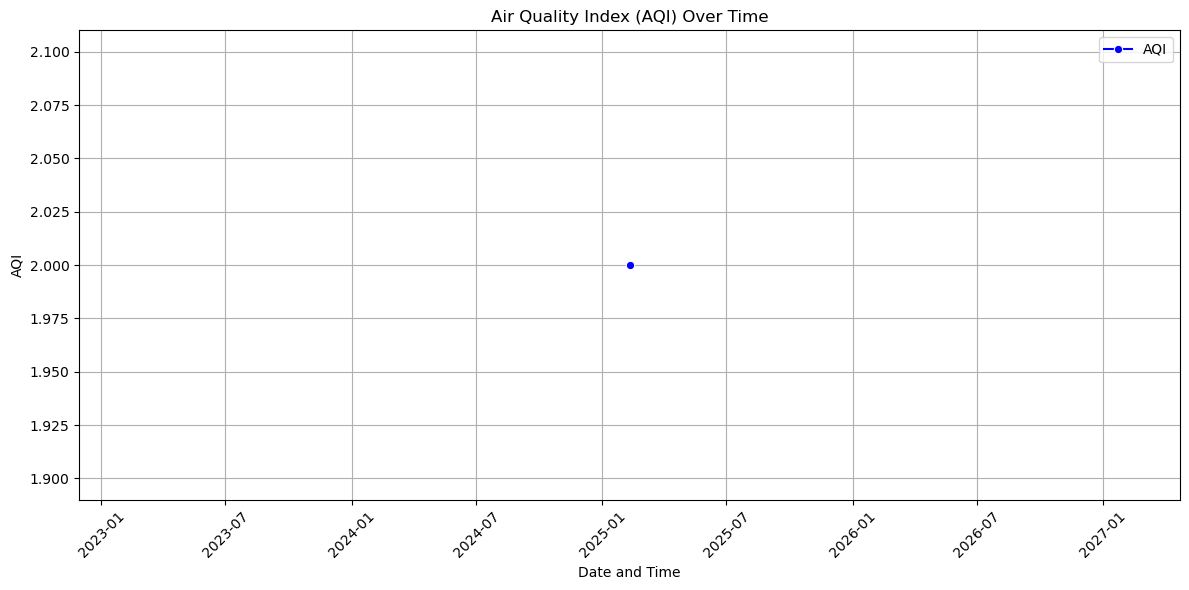

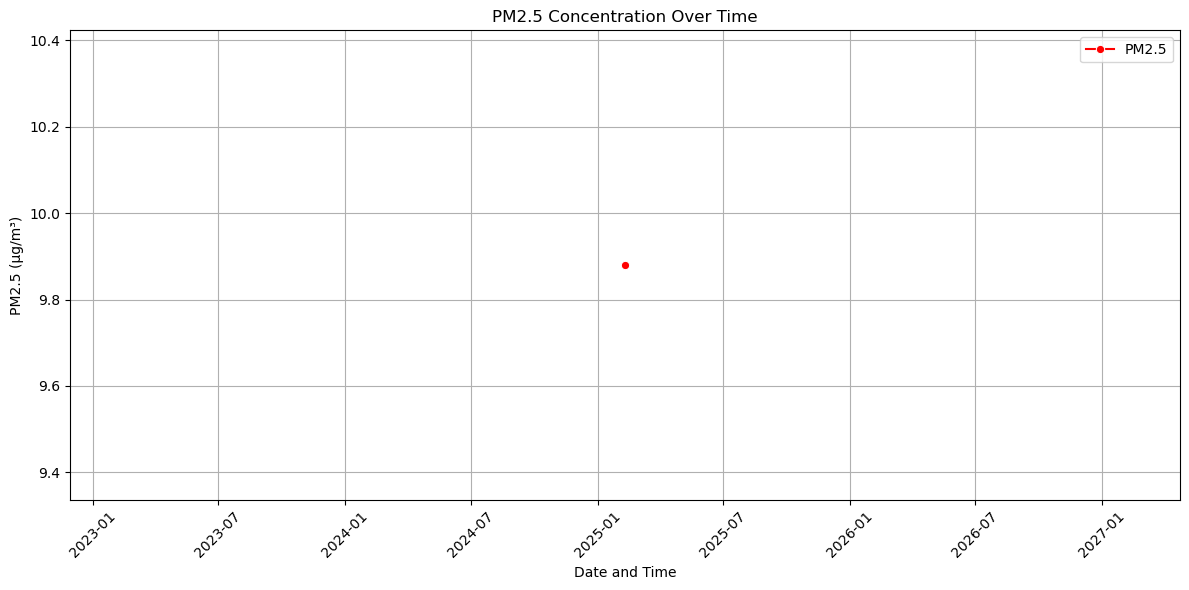

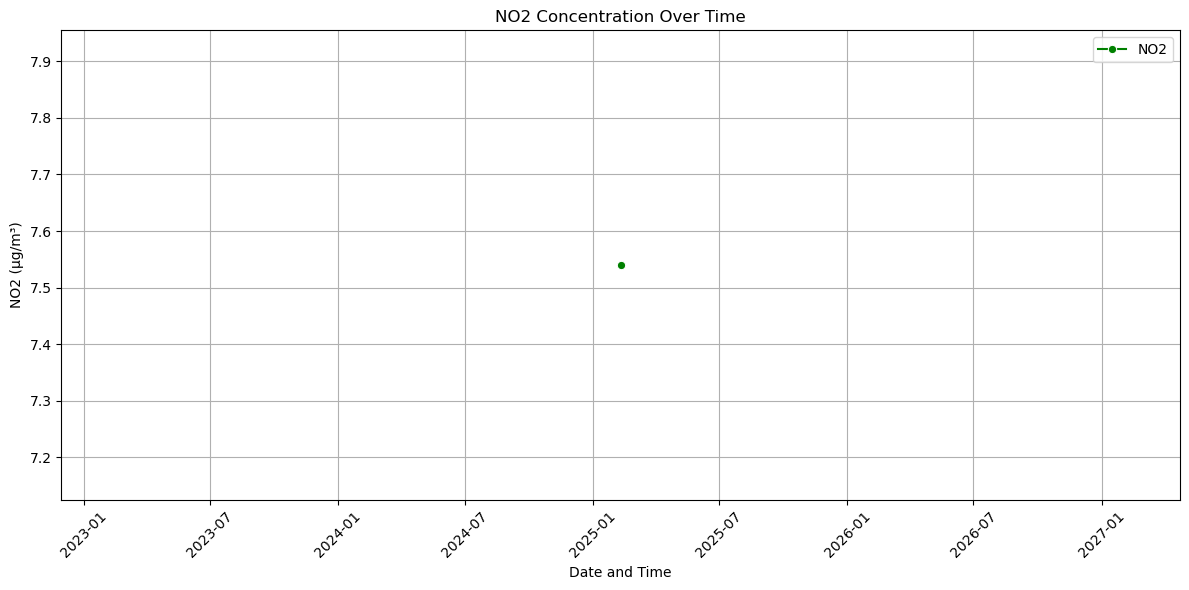

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

# Load the air quality data from the CSV
df = pd.read_csv("warsaw_air_quality.csv")

# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the datetime column as the index
df.set_index('datetime', inplace=True)

# Create a plot for the Air Quality Index (AQI)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['aqi'], marker='o', label="AQI", color="b")
plt.title("Air Quality Index (AQI) Over Time")
plt.xlabel("Date and Time")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()  

# Create a plot for PM2.5 levels
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['pm2_5'], marker='o', label="PM2.5", color="r")
plt.title("PM2.5 Concentration Over Time")
plt.xlabel("Date and Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()  

# Create a plot for NO2 levels
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['no2'], marker='o', label="NO2", color="g")
plt.title("NO2 Concentration Over Time")
plt.xlabel("Date and Time")
plt.ylabel("NO2 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()  


# Data Exploration and Cleaning

Missing Values:
 datetime    0
aqi         0
co          0
no          0
no2         0
o3          0
so2         0
pm2_5       0
pm10        0
nh3         0
dtype: int64
Summary Statistics:
                   datetime  aqi       co      no     no2   o3     so2   pm2_5  \
count                    1  1.0     1.00    1.00    1.00  1.0    1.00    1.00   
mean   2025-02-09 15:53:48  5.0  6248.47  343.32  145.32  0.0  263.21  539.46   
min    2025-02-09 15:53:48  5.0  6248.47  343.32  145.32  0.0  263.21  539.46   
25%    2025-02-09 15:53:48  5.0  6248.47  343.32  145.32  0.0  263.21  539.46   
50%    2025-02-09 15:53:48  5.0  6248.47  343.32  145.32  0.0  263.21  539.46   
75%    2025-02-09 15:53:48  5.0  6248.47  343.32  145.32  0.0  263.21  539.46   
max    2025-02-09 15:53:48  5.0  6248.47  343.32  145.32  0.0  263.21  539.46   
std                    NaN  NaN      NaN     NaN     NaN  NaN     NaN     NaN   

         pm10     nh3  
count    1.00    1.00  
mean   651.69  110.45  
min    

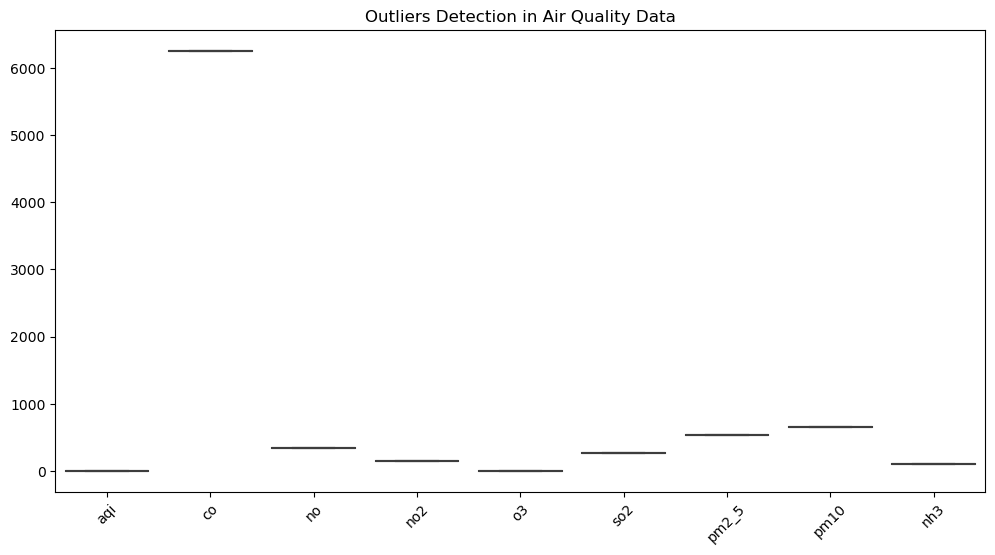

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("india_air_quality.csv")

# Convert 'datetime' to proper format
df['datetime'] = pd.to_datetime(df['datetime'])

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("Summary Statistics:\n", df.describe())

# Detect Outliers using Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['datetime']))
plt.xticks(rotation=45)
plt.title("Outliers Detection in Air Quality Data")
plt.show()

# Additional Pollutants Visualization

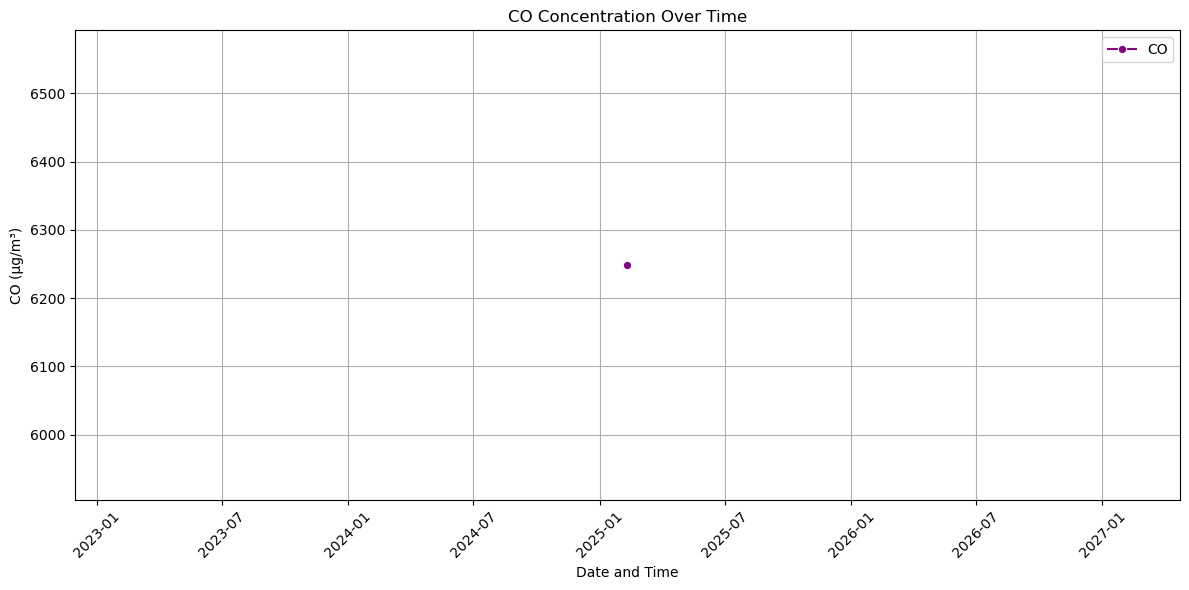

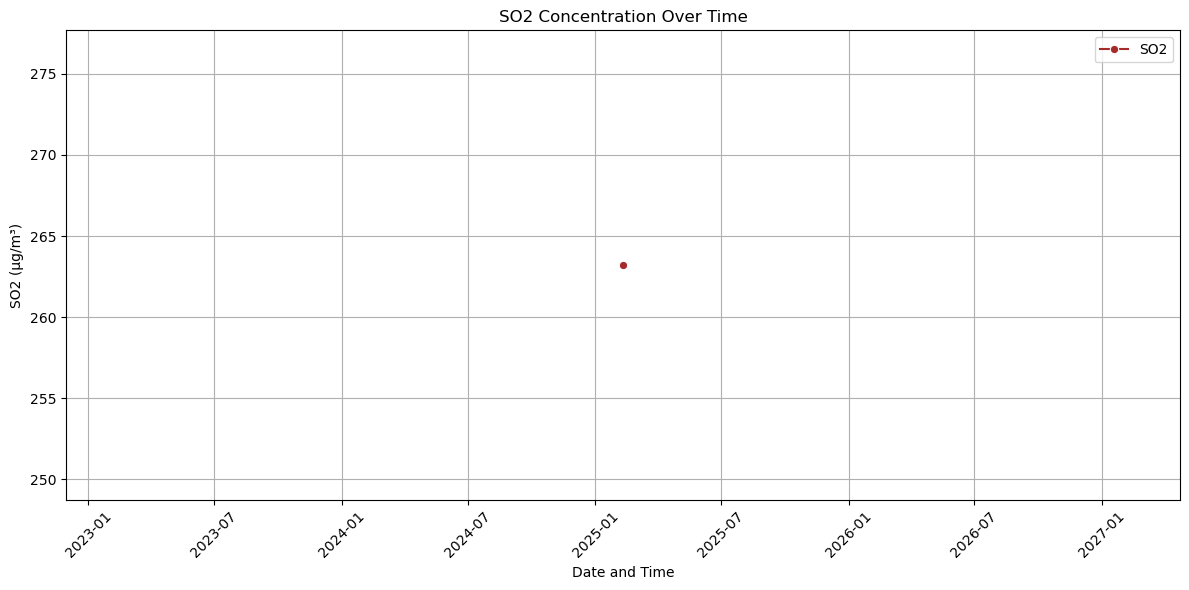

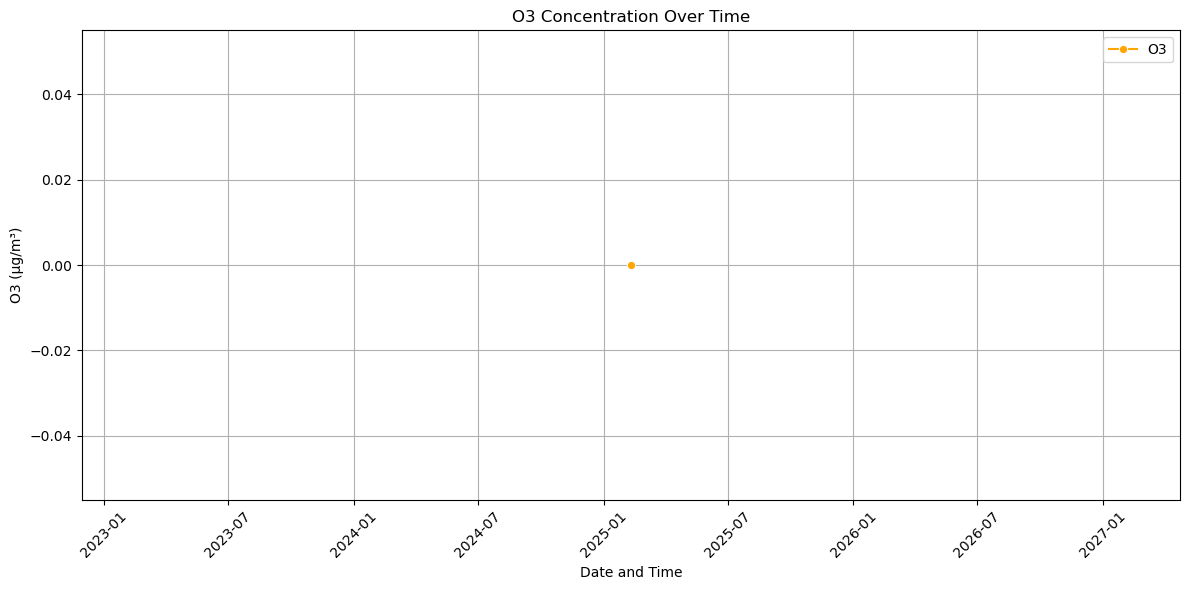

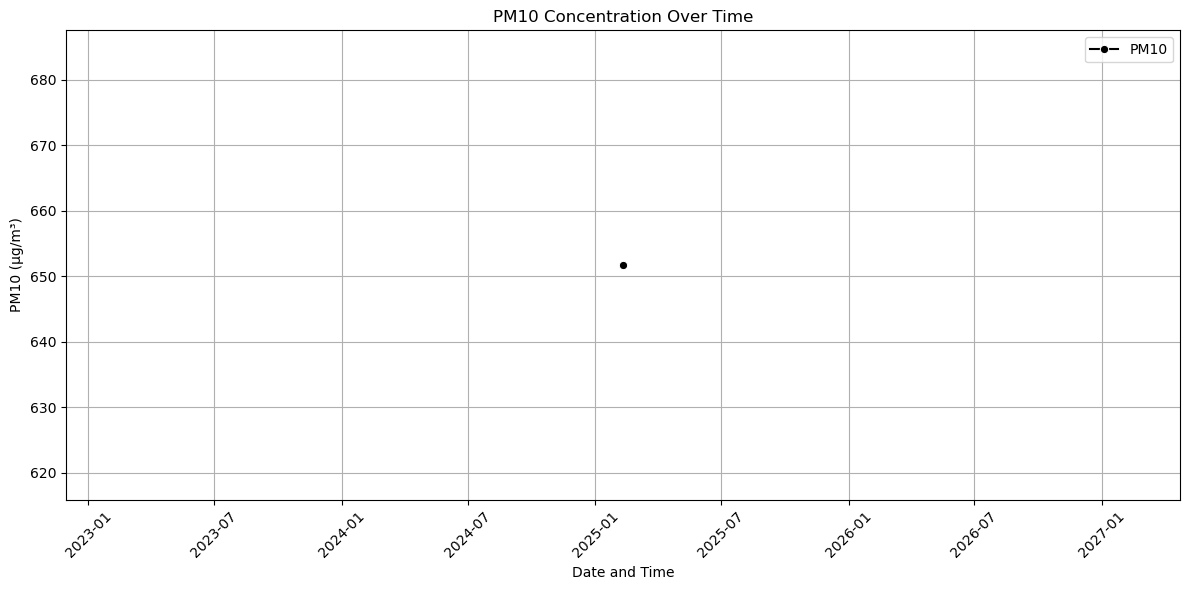

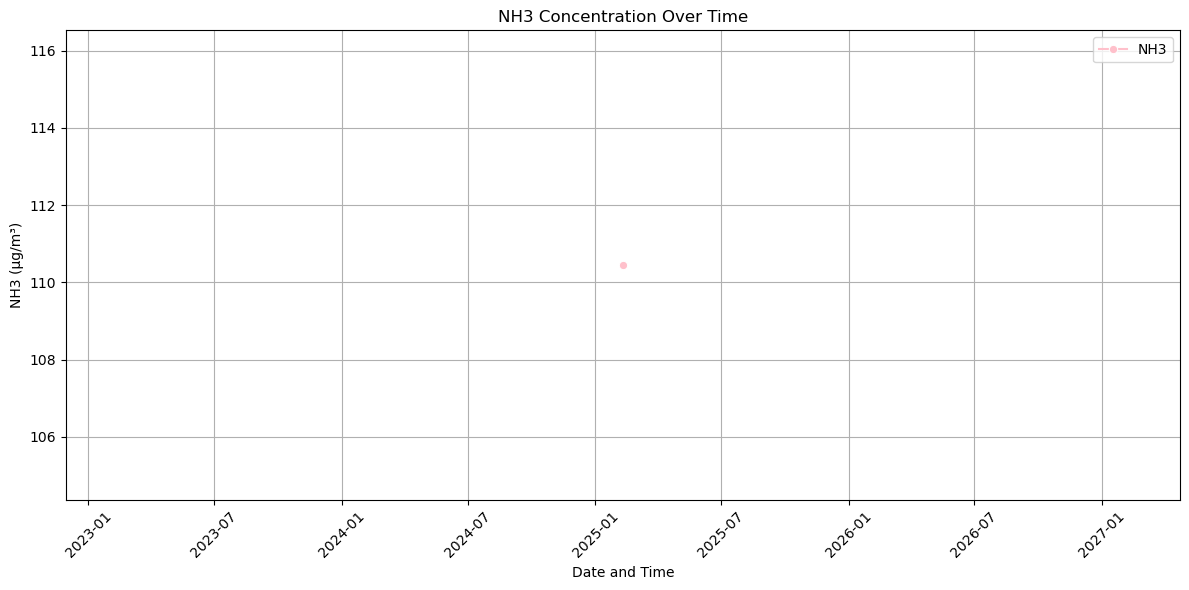

In [32]:
pollutants = ["co", "so2", "o3", "pm10", "nh3"]
colors = ["purple", "brown", "orange", "black", "pink"]

for pollutant, color in zip(pollutants, colors):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df["datetime"], y=df[pollutant], marker='o', label=pollutant.upper(), color=color)
    plt.title(f"{pollutant.upper()} Concentration Over Time")
    plt.xlabel("Date and Time")
    plt.ylabel(f"{pollutant.upper()} (µg/m³)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

# Rolling Average for Trend Analysis

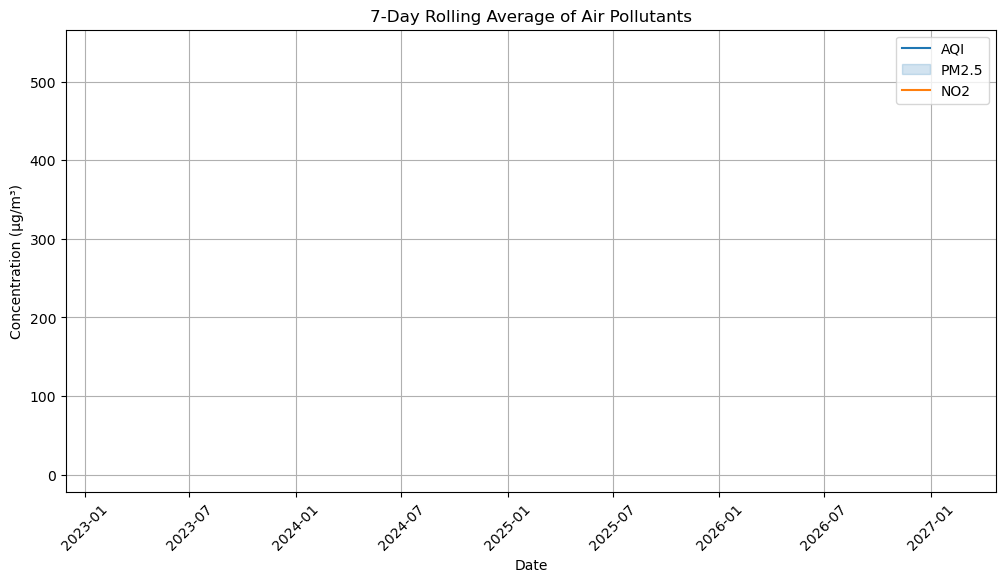

In [25]:
df.set_index("datetime", inplace=True)  # Set datetime as index
df_rolling = df.rolling('7D').mean()  # 7-day rolling average

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rolling[['aqi', 'pm2_5', 'no2']], dashes=False)
plt.title("7-Day Rolling Average of Air Pollutants")
plt.xlabel("Date")
plt.ylabel("Concentration (µg/m³)")
plt.legend(["AQI", "PM2.5", "NO2"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlation Analysis (Heatmap)

C:\Users\Rita\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Rita\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


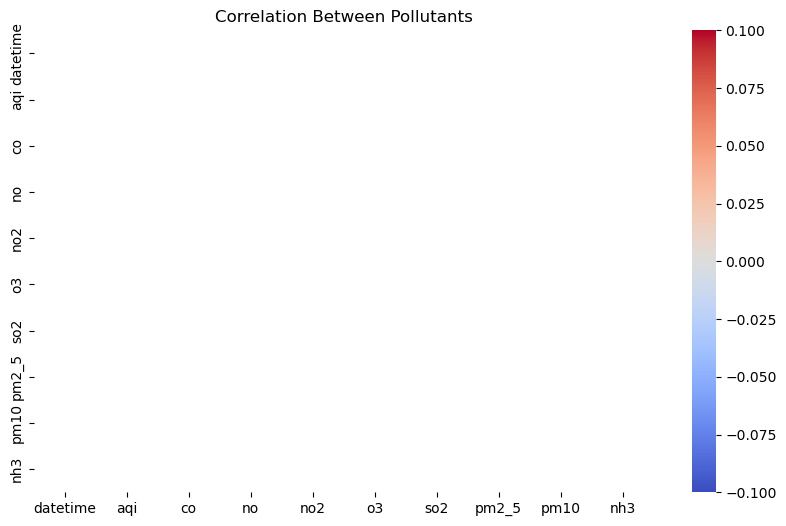

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Pollutants")
plt.show()

# Anomaly Detection (Unusual Pollution Spikes)


In [34]:
from scipy.stats import zscore

df["aqi_zscore"] = zscore(df["aqi"])
outliers = df[df["aqi_zscore"].abs() > 3]  # Threshold: |Z-score| > 3

print("Detected Anomalies:\n", outliers[["aqi", "aqi_zscore"]])


Detected Anomalies:
 Empty DataFrame
Columns: [aqi, aqi_zscore]
Index: []
